In [15]:
import pandas as pd

In [16]:
df = pd.read_csv(r"C:\Users\badsh\Downloads\customer_churn_data.csv")

In [17]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [19]:
df.isna().sum().sum()

297

In [20]:
df["InternetService"] = df["InternetService"].fillna("")

In [21]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [24]:
numeric_columns_data = df.select_dtypes(include = ["number"])

In [25]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [26]:
import matplotlib.pyplot as plt

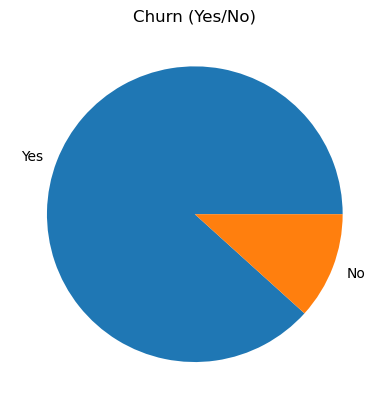

In [27]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [28]:
df.groupby("Churn")["Age"].mean()


Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [29]:
df.groupby(["Churn", "ContractType"])["MonthlyCharges"].mean()


Churn  ContractType  
No     One-Year          62.113662
       Two-Year          63.214348
Yes    Month-to-Month    75.909198
       One-Year          77.636330
       Two-Year          73.760000
Name: MonthlyCharges, dtype: float64

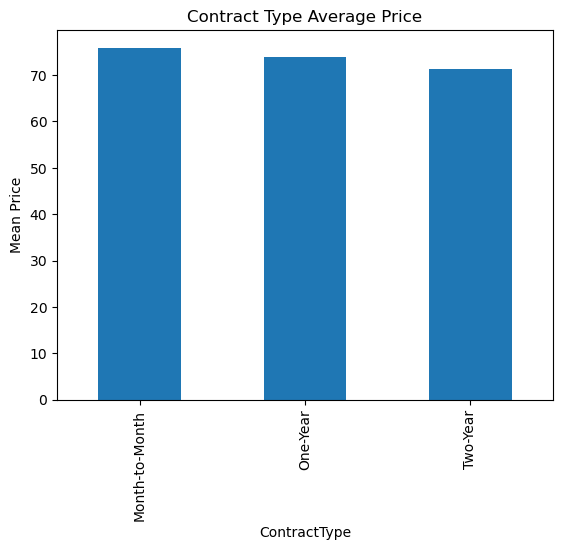

In [30]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.title("Contract Type Average Price")
plt.show()

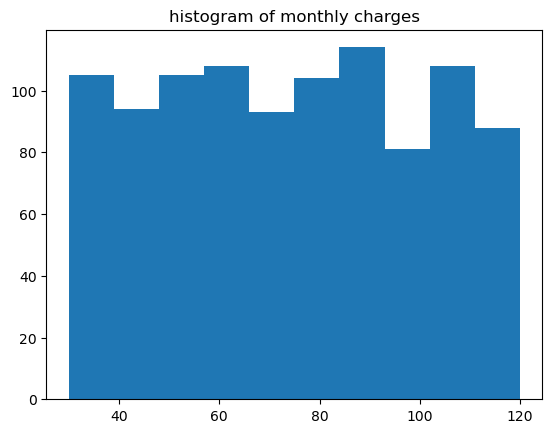

In [31]:
plt.hist(df["MonthlyCharges"])
plt.title("histogram of monthly charges")
plt.show()

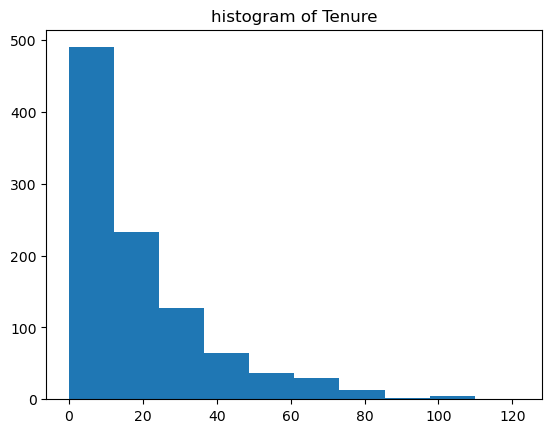

In [32]:
plt.hist(df["Tenure"])
plt.title("histogram of Tenure")
plt.show()

In [33]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [34]:
y=df[["Churn"]]

In [35]:
x=df[["Age","Gender","Tenure","MonthlyCharges"]]

In [36]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [41]:
x #(1). female (0). male

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [38]:
 x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\badsh\AppData\Local\Temp\ipykernel_18744\3896733179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [39]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


C:\Users\badsh\AppData\Local\Temp\ipykernel_18744\2818957861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [42]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [84]:
x_train = scaler.fit_transform(x_train)

In [47]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [48]:
x_test = scaler.transform(x_test)

In [72]:
x_train

array([[-0.46874563,  0.92528293, -0.93373778,  0.47562182],
       [ 0.55583499,  0.92528293,  0.98175451,  1.66528268],
       [ 1.06812529, -1.08075052,  1.395915  , -1.63082774],
       ...,
       [ 0.65829305, -1.08075052,  2.84547673,  0.63949973],
       [ 0.2484608 ,  0.92528293, -0.10541679, -1.39196795],
       [ 0.86320917, -1.08075052,  0.25697364,  1.50449681]])

In [73]:
x_test

array([[-1.28841013e+00,  9.25282925e-01,  1.08529463e+00,
         3.12903419e-01],
       [ 7.60751109e-01,  9.25282925e-01,  9.29984446e-01,
        -3.24056006e-01],
       [ 4.53376924e-01,  9.25282925e-01,  2.63839648e+00,
        -2.38252006e-01],
       [-2.63829509e-01, -1.08075052e+00,  6.71134138e-01,
        -2.12742709e-01],
       [-1.59578431e+00, -1.08075052e+00,  1.53433520e-01,
         1.62392670e+00],
       [ 1.88778979e+00, -1.08075052e+00, -9.85507838e-01,
        -3.73528583e-01],
       [-1.61371447e-01, -1.08075052e+00, -9.33737776e-01,
        -3.88988763e-01],
       [ 9.65667233e-01,  9.25282925e-01, -4.67807220e-01,
        -3.49506362e-02],
       [ 5.55834985e-01, -1.08075052e+00, -5.71347344e-01,
        -6.00734290e-02],
       [-2.72282299e+00,  9.25282925e-01,  9.81754508e-01,
        -1.68107332e+00],
       [ 1.17058336e+00,  9.25282925e-01, -2.60726973e-01,
        -6.49879304e-01],
       [-5.71203695e-01, -1.08075052e+00,  2.56973644e-01,
      

In [74]:
from sklearn.metrics import confusion_matrix, classification_report


In [75]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))
            

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_model = LogisticRegression()

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [81]:
y_pred = log_model.predict(x_test)

In [82]:
modelperformance(y_pred)

Accuracy score on model is 0.89
Confusion Matrix:
 [[  0  22]
 [  0 178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      1.00      0.94       178

    accuracy                           0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



In [87]:
# Import everything you need
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set the parameter grid for GridSearch
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

# Create the GridSearchCV object
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model to the training data
gridkn.fit(x_train, y_train)

# Get best parameters and score
print("✅ Best Score from Grid Search: ", gridkn.best_score_)
print("✅ Best Parameters: ", gridkn.best_params_)

# Make predictions on test set using best model
y_pred = gridkn.predict(x_test)

# Define a performance evaluation function
def modelperformance(predictions):
    print("🔍 Accuracy score on model is: {:.2f}".format(accuracy_score(y_test, predictions)))
    print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("\n🧾 Classification Report:\n", classification_report(y_test, predictions))

# Call the function to evaluate the tuned model
modelperformance(y_pred)


✅ Best Score from Grid Search:  0.86875
✅ Best Parameters:  {'n_neighbors': 9, 'weights': 'uniform'}
🔍 Accuracy score on model is: 0.89

📊 Confusion Matrix:
 [[  0  22]
 [  0 178]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      1.00      0.94       178

    accuracy                           0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Step 1: Create the model
svm = SVC()

# Step 2: Define the grid of hyperparameters
param_grid = {
    "C": [0.01, 0.1, 0.5, 1],
    "kernel": ["linear", "rbf", "poly"]
}

# Step 3: Setup Grid Search with 5-fold cross-validation
gridsvc = GridSearchCV(svm, param_grid, cv=5)

# Step 4: Fit the model on training data
gridsvc.fit(x_train, y_train)

# Step 5: Print the best model settings
print("Best Parameters:", gridsvc.best_params_)
print("Best Score:", gridsvc.best_score_)


Best Parameters: {'C': 0.01, 'kernel': 'linear'}
Best Score: 0.88125


In [89]:
y_pred = gridsvc.predict(x_test)


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      1.00      0.94       178

    accuracy                           0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



In [91]:
from sklearn.tree import DecisionTreeClassifier


In [92]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [93]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)


In [94]:
# Step 1: Fit the grid search model on training data
grid_tree.fit(x_train, y_train)

# Step 2: Print the best combo and its score
print("Best Parameters from Grid Search:", grid_tree.best_params_)
print("Best Accuracy Score from Grid Search:", grid_tree.best_score_)

# Step 3: Use the best model to predict
y_pred = grid_tree.predict(x_test)

# Step 4: Evaluate it
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters from Grid Search: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Accuracy Score from Grid Search: 0.865
Accuracy: 0.845
Confusion Matrix:
 [[  3  19]
 [ 12 166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.14      0.16        22
           1       0.90      0.93      0.91       178

    accuracy                           0.84       200
   macro avg       0.55      0.53      0.54       200
weighted avg       0.82      0.84      0.83       200



In [97]:
# Step 1: Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rfc_model = RandomForestClassifier(random_state=42)

In [98]:
param_grid = {
    "n_estimators": [32, 64, 128, 256],
    "max_features": [2, 3, 4],
    "bootstrap": [True, False]
}

# Step 6: GridSearchCV setup
grid_rfc = GridSearchCV(estimator=rfc_model,
                        param_grid=param_grid,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

In [99]:
grid_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]},
             verbose=1)

In [100]:
best_model = grid_rfc.best_estimator_

In [102]:
y_pred = best_model.predict(x_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)

In [105]:
import seaborn as sns

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy on Test Set: {accuracy:.2f}")


🎯 Accuracy on Test Set: 0.87


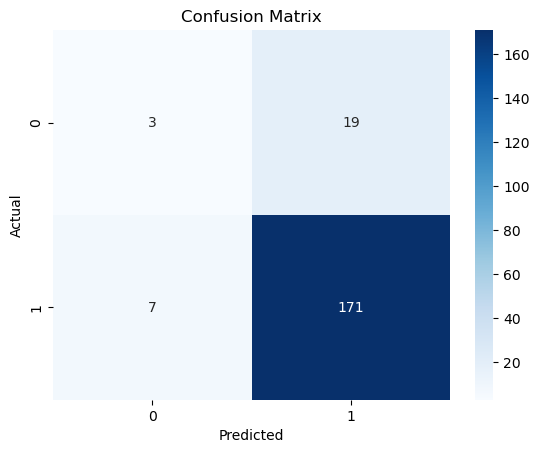

In [107]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [114]:
best_model = gridsvc.best_estimator_


In [115]:
import joblib

# Save the trained model to a file called 'model.pkl'
joblib.dump(best_model, "model.pkl")


['model.pkl']